# Support Vector Machine Implementation: ML Pipeline

### Importing libraries, enabling plotting
This snippet of code imports relevant libraries,including a pre-written processing function to load-in the downloaded datasets. This section also configures the plot settings for in line plotting on the notebook.

In [19]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

# load pre-made data utilities
from cs231n.data_utils import load_CIFAR10

# In-line plots instead of new windows
%matplotlib inline
plt.rcParams['figure.figsize'] = [10.0, 8.0]
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Magic to make the notebook reload external python module
%reload_ext autoreload
%autoreload 2


### CIFAR-10 Data load
In this segment I take the file path of the data folder and load it into a prebuilt program that processes the data files. This is part of a data_utils package that was provided by cs231n. The matrix shapes help me visualize the data, so I often include these. 

In [20]:
# load the data with the function load_CIFAR10
data_path = 'cs231n/datasets/cifar-10-batches-py'
train, train_labels, test, test_labels = load_CIFAR10(data_path)

# Check sizes of data
print('\nTraining data shape:\t', train.shape,
      '\nTraining labels shape:\t', train_labels.shape,
      '\nTest data shape:\t', test.shape,
      '\nTest labels shape:\t', test_labels.shape)



Training data shape:	 (50000, 32, 32, 3) 
Training labels shape:	 (50000,) 
Test data shape:	 (10000, 32, 32, 3) 
Test labels shape:	 (10000,)


### Exercise in Visualizing sampled data
This is a snipped of pre-written code to visualize some of the data--converting the raw tabulated pixel data into a graphed image using plt.imshow

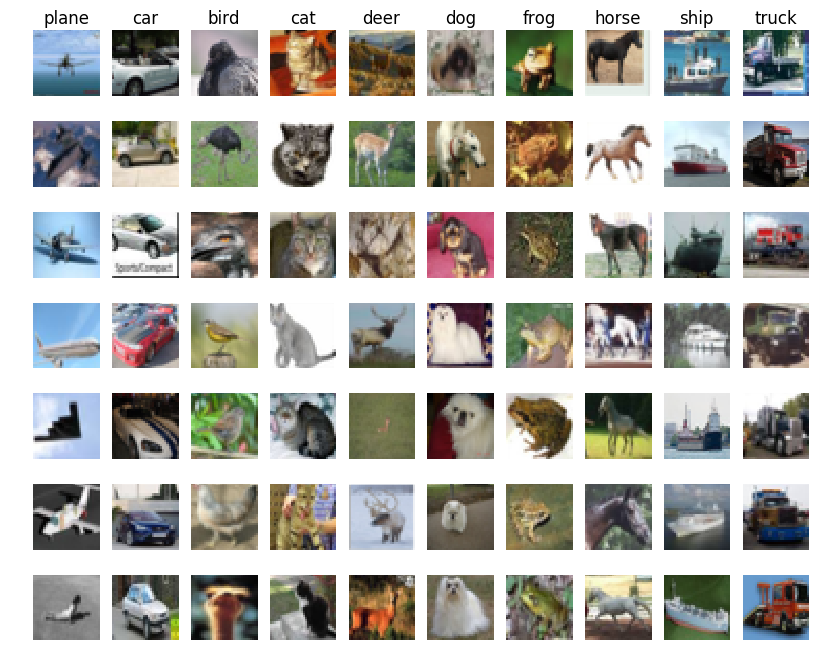

In [21]:
# Pre-defined classes
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Number of classes: k
k = len(classes)

# Number of samples per class
sample_size = 7

for cls_num, cls in enumerate(classes):
    
    # get all the matching label numbers
    matches = np.flatnonzero(train_labels == cls_num)
    matches = np.random.choice(matches, sample_size, replace=False)
    
    for i, indx in enumerate(matches):
        plt_idx = i * k + cls_num + 1
        plt.subplot(sample_size, k, plt_idx)
        plt.imshow(train[indx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
            
plt.show()

# Data Pre-processing

### Create a Sample of data for faster execution
For faster and cheaper development, I'm training and doing initial tuning from my laptop (no GPU performance). It helps to work with a smaller dataset. The datasets are re-assigned so I start with validation set so I don't overwrite the train set prematurely. 

In [22]:
# Sample sizes:
train_size = 45000
valid_size = 5000
test_size = 5000

# Create a mask to reassign subset of datasets
mask = range(train_size, train_size + valid_size)
valid = train[mask]
valid_labels = train_labels[mask]

mask = range(train_size)
train = train[mask]
train_labels = train_labels[mask]

mask = range(test_size)
test = test[mask]
test_labels = test_labels[mask]

print('Incoming Data Shape:\n'
 '\n\tTrain data shape:\t', train.shape,
 '\n\tTrain labels shape:\t', train_labels.shape,
 '\n\tValidation data shape:\t', valid.shape,
 '\n\tValidation labels shape:', valid_labels.shape,
 '\n\tTest data shape:\t', test.shape,
 '\n\tTest labels shape:\t', test_labels.shape)


Incoming Data Shape:

	Train data shape:	 (45000, 32, 32, 3) 
	Train labels shape:	 (45000,) 
	Validation data shape:	 (5000, 32, 32, 3) 
	Validation labels shape:  (5000,) 
	Test data shape:	 (5000, 32, 32, 3) 
	Test labels shape:	 (5000,)


Next thing, we're looking to reshape this 32x32 pixel x 3 RGB layer matrix of examples to a 2D matrix of examples by dimensions.
To do this, we control the number of rows (which should be the number of examples we decided in the code above), and let the columns resize accordingly. The mechanics of this reshaping process is still a bit fuzzy to me, TODO: Revisit reshape function.

In [23]:
# Reshape to fit the [M x D] structure (D dimensions, M examples)
train = train.reshape((train_size, -1))
valid = valid.reshape((valid_size, -1))
test = test.reshape((test_size, -1))

In [24]:
# Sanity Checks on size
print('Reshaped:\n'
 '\n\tTrain data shape:\t', train.shape,
 '\n\tTrain labels shape:\t', train_labels.shape,
 '\n\tValidation data shape:\t', valid.shape,
 '\n\tValidation labels shape:', valid_labels.shape,
 '\n\tTest data shape:\t', test.shape,
 '\n\tTest labels shape:\t', test_labels.shape)

Reshaped:

	Train data shape:	 (45000, 3072) 
	Train labels shape:	 (45000,) 
	Validation data shape:	 (5000, 3072) 
	Validation labels shape: (5000,) 
	Test data shape:	 (5000, 3072) 
	Test labels shape:	 (5000,)


### Center and normalize the data
In this subset of code, we're looking to center all the data about the mean score. Mean would be a value of 0, and all the data would be some degree of standard deviations away. 

Question for myself: perhaps this is a good point to do scaling of features as well? Since all the features are just pixels and already scaled to eachother, this step is probably not necessary but it's probably best practice to scale between -1 and 1.

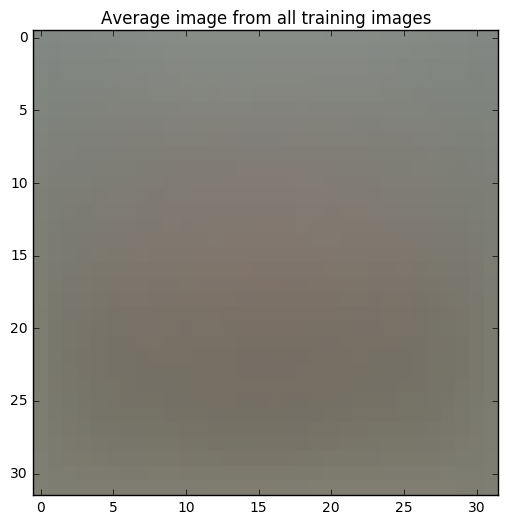

In [25]:
# Create an average image of all images
mean_image = np.average(train, axis=0)

# Show what it looks like
plt.figure(figsize=(6,6))
plt.title('Average image from all training images')
plt.imshow(mean_image.reshape(32,32,3).astype('uint8'))

# subtract the mean image from all the images (centering about mean)
train = train - mean_image
valid = valid - mean_image
test = test - mean_image


In [26]:
# Add Bias
ones = np.ones_like(train[:,1]).reshape(-1,1)
train = np.hstack((train, ones))

ones = np.ones_like(valid[:,1]).reshape(-1,1)
valid = np.hstack((valid, ones))

ones = np.ones_like(test[:,1]).reshape(-1,1)
test = np.hstack((test, ones))



# Training the Model
TODO (Rough Outline):
initialize the weights matrix
get the loss and gradient from the SVM classifier (feeding in necessary info

Here is the initial code, it will execute the first iteration of calculating loss and gradient.

In [32]:
# Import the classifier
from cs231n.classifiers.multiclass_svm import linear_svm_vectorized

9


In [ ]:
# Initialize the Weights (could initialize them to zero)

# Not sure how many classes exist, get the highest one
classes = max(train_labels)
features = train.shape[1]

Weights = np.ones(classes, features) * 0.1

